In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Section 1

## Read in the data

In [2]:
# read in data file 
# add column names

df = pd.read_csv('MM.data', header=None)

newcols = {}
for col in df.columns:
    newcols[col] = 'V{}'.format(col+1)
df.rename(index=str, columns=newcols, inplace=True)    

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Exploratory Analysis and Data Visualisation

### Q1) How many features and observations are present in the data set?

In [3]:
feature_count = len(df.columns)
obs_count = len(df.index)

print('There are {} features and {} observations'.format(feature_count, obs_count))

There are 11 features and 19020 observations


### Q2) Identify the only categorical variable; how many levels does it contain and what are the counts for each level? 


In [4]:
print('The categorical variable is V11, it has {} levels'.format(len(df.V11.unique())))

group_df = df.groupby('V11').V1.count().reset_index().rename(index=str, columns={'V1':'count'})
group_df.head()

The categorical variable is V11, it has 2 levels


,V11,count
0,g,12332
1,h,6688


### Q3) Compare the distributions of V1, V4 and V7 split by the levels of the categorical variable. 

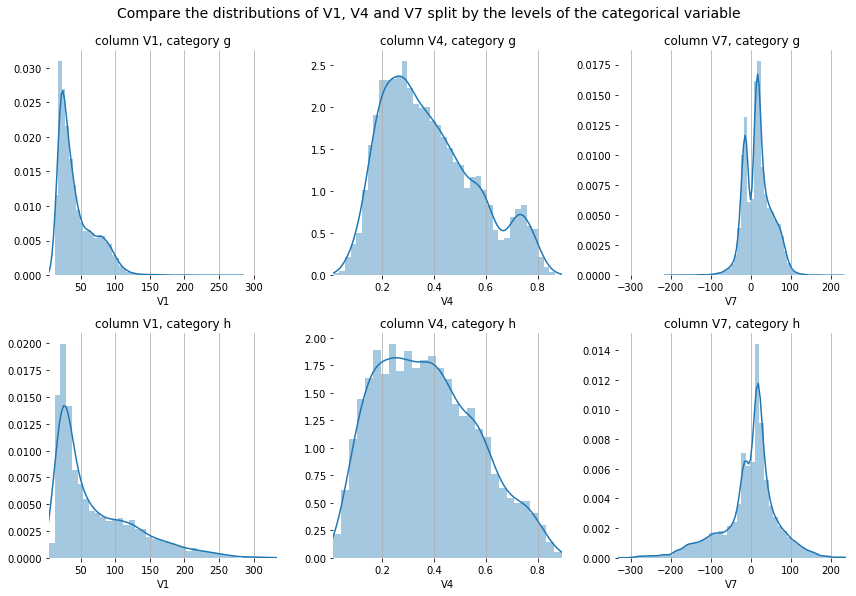

In [5]:
cols = ['V1', 'V4', 'V7']
levels = df.V11.unique()


fig, ax = plt.subplots(len(levels), len(cols), figsize=(12, 8), sharex=False, sharey=False)

for i, col in enumerate(cols):
    
    colmin = df[col].min()
    colmax = df[col].max()
    
    for j, level in enumerate(levels):
        
        ax[j, i] = sns.distplot(df[df.V11==level][col], ax=ax[j, i])
        ax[j, i].set_xlim([colmin, colmax])
        ax[j, i].xaxis.grid(True)
        ax[j, i].set_title('column {}, category {}'.format(col, level))


plt.tight_layout()  
sns.despine(bottom=True, left=True)
plt.suptitle('Compare the distributions of V1, V4 and V7 split by the levels of the categorical variable', y=1.03, fontsize=14) 
plt.show()

### Q4) We’re interested in the variables that have the highest and lowest correlations in our data set

In [6]:
# get correlations
corrs = df.corr()

# get absolute correlations
abs_corr = df.corr().abs()

# reshape dataframe
sorted_corr = abs_corr.unstack().reset_index().rename(index=str, columns={0:'pearson'})

# remove self correlation
sorted_corr = sorted_corr.loc[sorted_corr.level_0!=sorted_corr.level_1]

corrs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
V1,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
V2,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
V3,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
V4,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
V5,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
V6,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
V7,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
V8,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
V9,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
V10,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


#### a) Identify the two most strongly correlated variables.

In [7]:
var_0 = sorted_corr.loc[sorted_corr.pearson.idxmax(), 'level_0']
var_1 = sorted_corr.loc[sorted_corr.pearson.idxmax(), 'level_1']
max_corr = corrs.loc[var_0, var_1]

print('The most strongly correlated variables are {} and {}, with a pearsons correlation of {:.4f}'.format(var_0, var_1, max_corr))

The most strongly correlated variables are V4 and V5, with a pearsons correlation of 0.9764


#### b) Identify the least correlated variables.

In [8]:
var_0 = sorted_corr.loc[sorted_corr.pearson.idxmin(), 'level_0']
var_1 = sorted_corr.loc[sorted_corr.pearson.idxmin(), 'level_1']
min_corr = corrs.loc[var_0, var_1]

print('The least correlated variables are {} and {}, with a pearsons correlation of {:.4f}'.format(var_0, var_1, min_corr))

The least correlated variables are V6 and V8, with a pearsons correlation of 0.0026


#### c) Produce a plot to represent the “correlation matrix”.

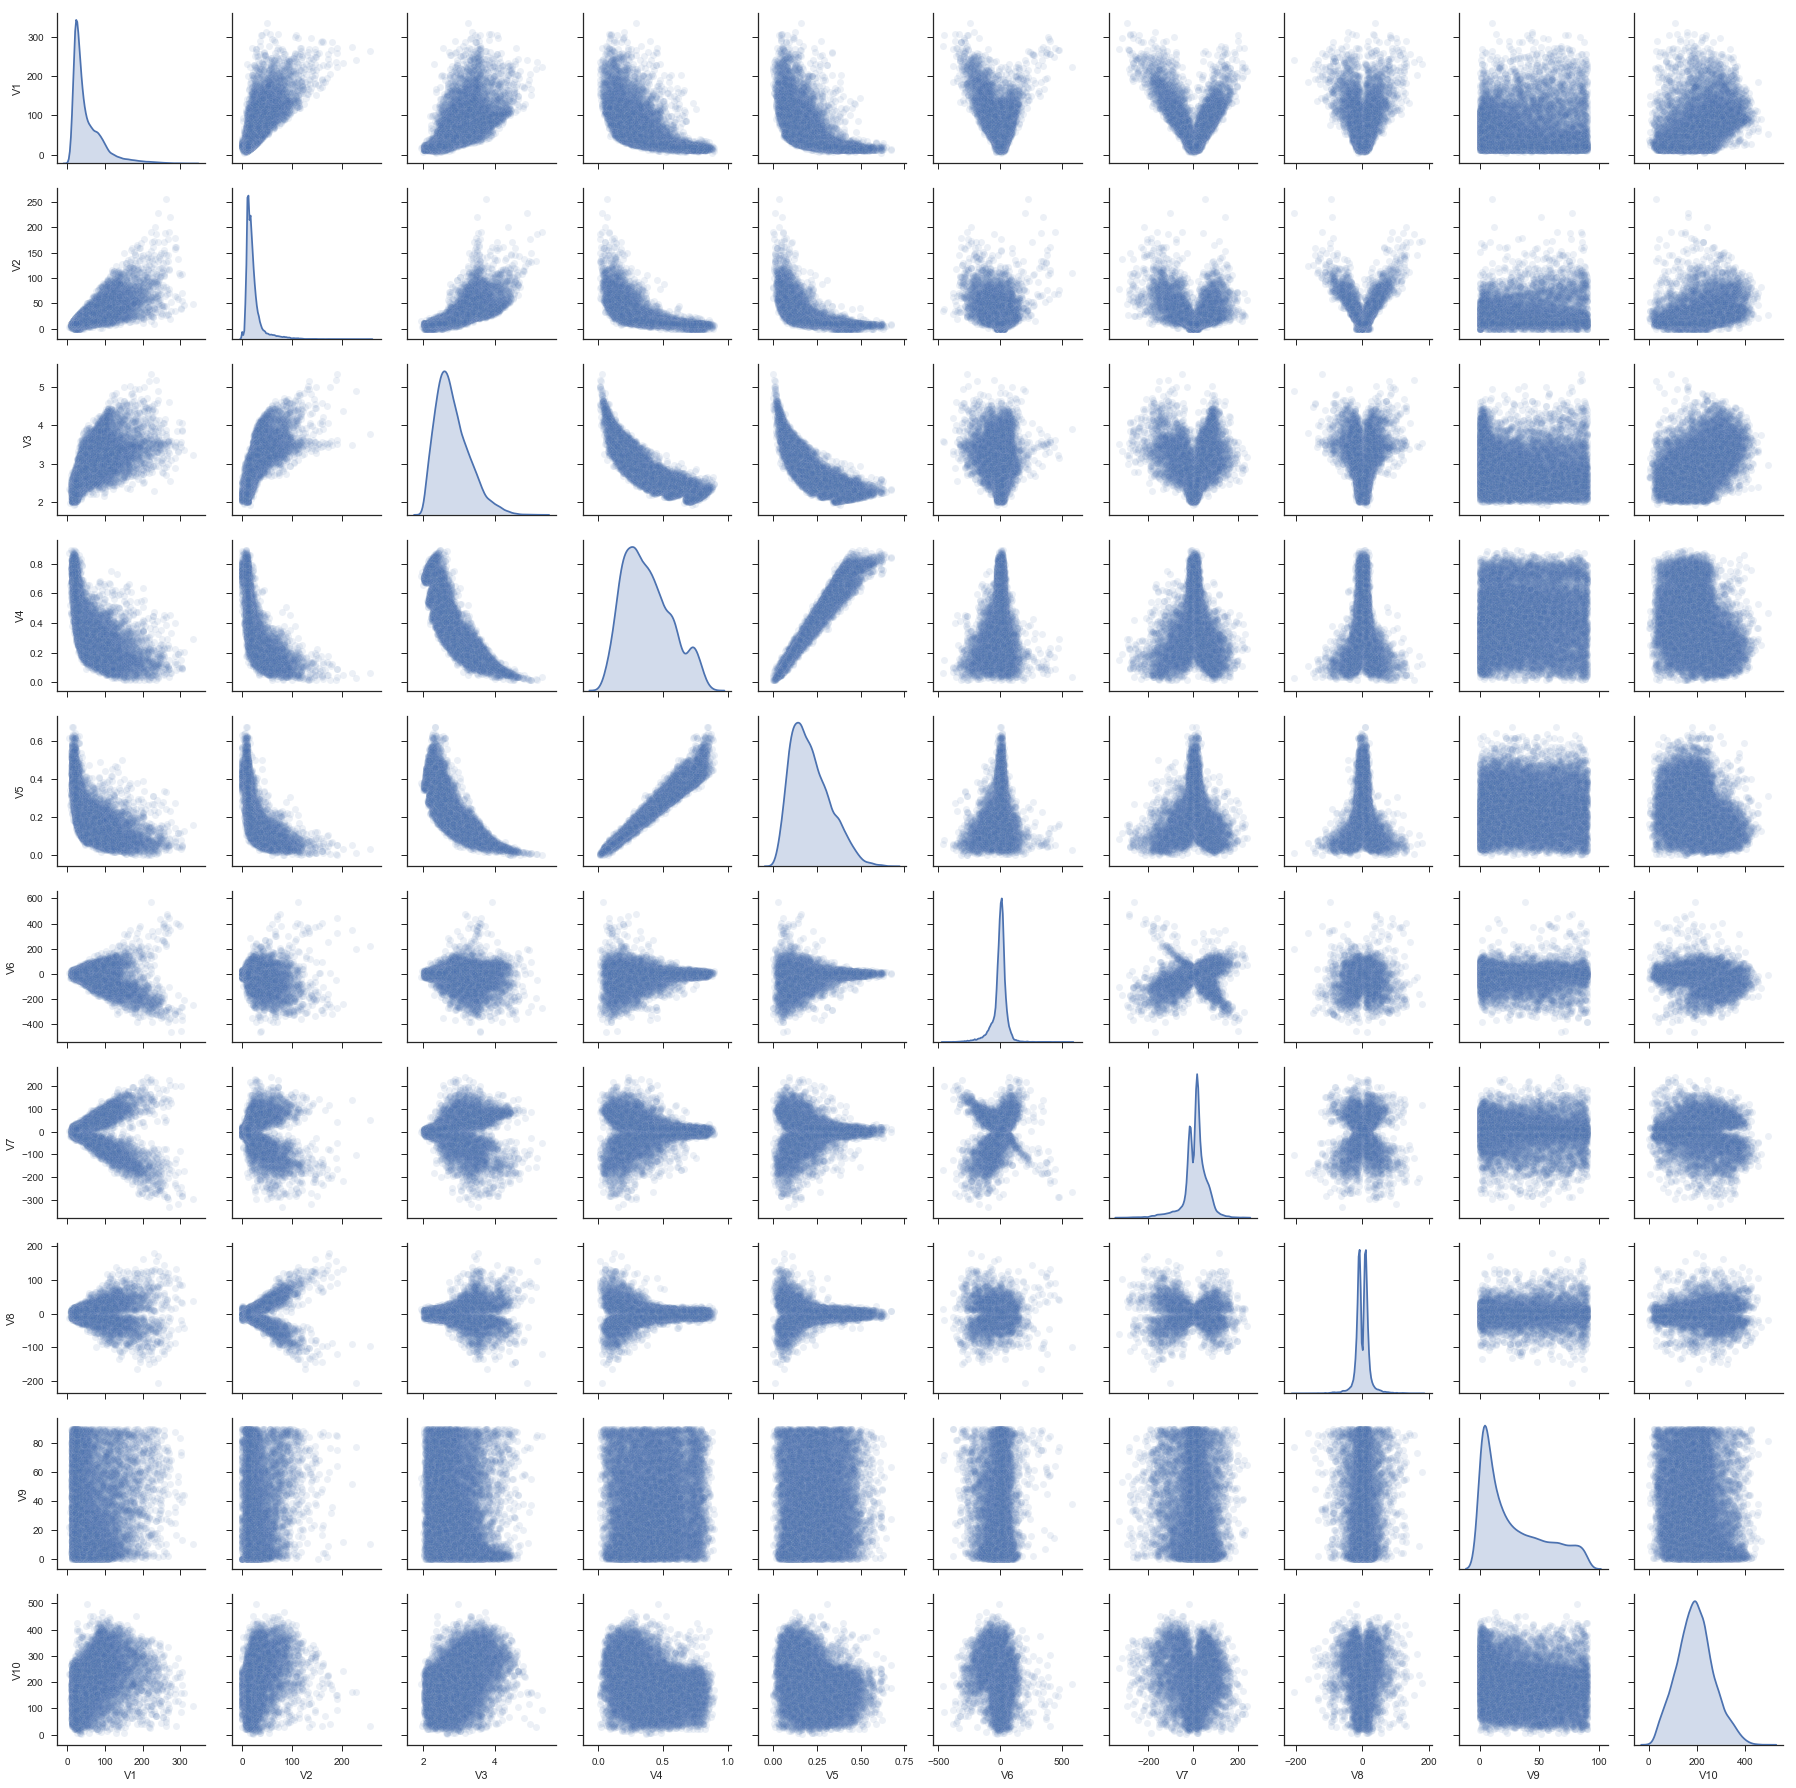

In [11]:
sns.set(style='ticks')
sns.pairplot(df[df.columns[:-1]], plot_kws=dict(alpha=0.1), diag_kind='kde', diag_kws=dict(shade=True))
plt.show()

### With "h" and "g" seperated and all plots on same scale

In [17]:
min_val = df[df.columns[:-1]].values.min()
max_val = df[df.columns[:-1]].values.max()

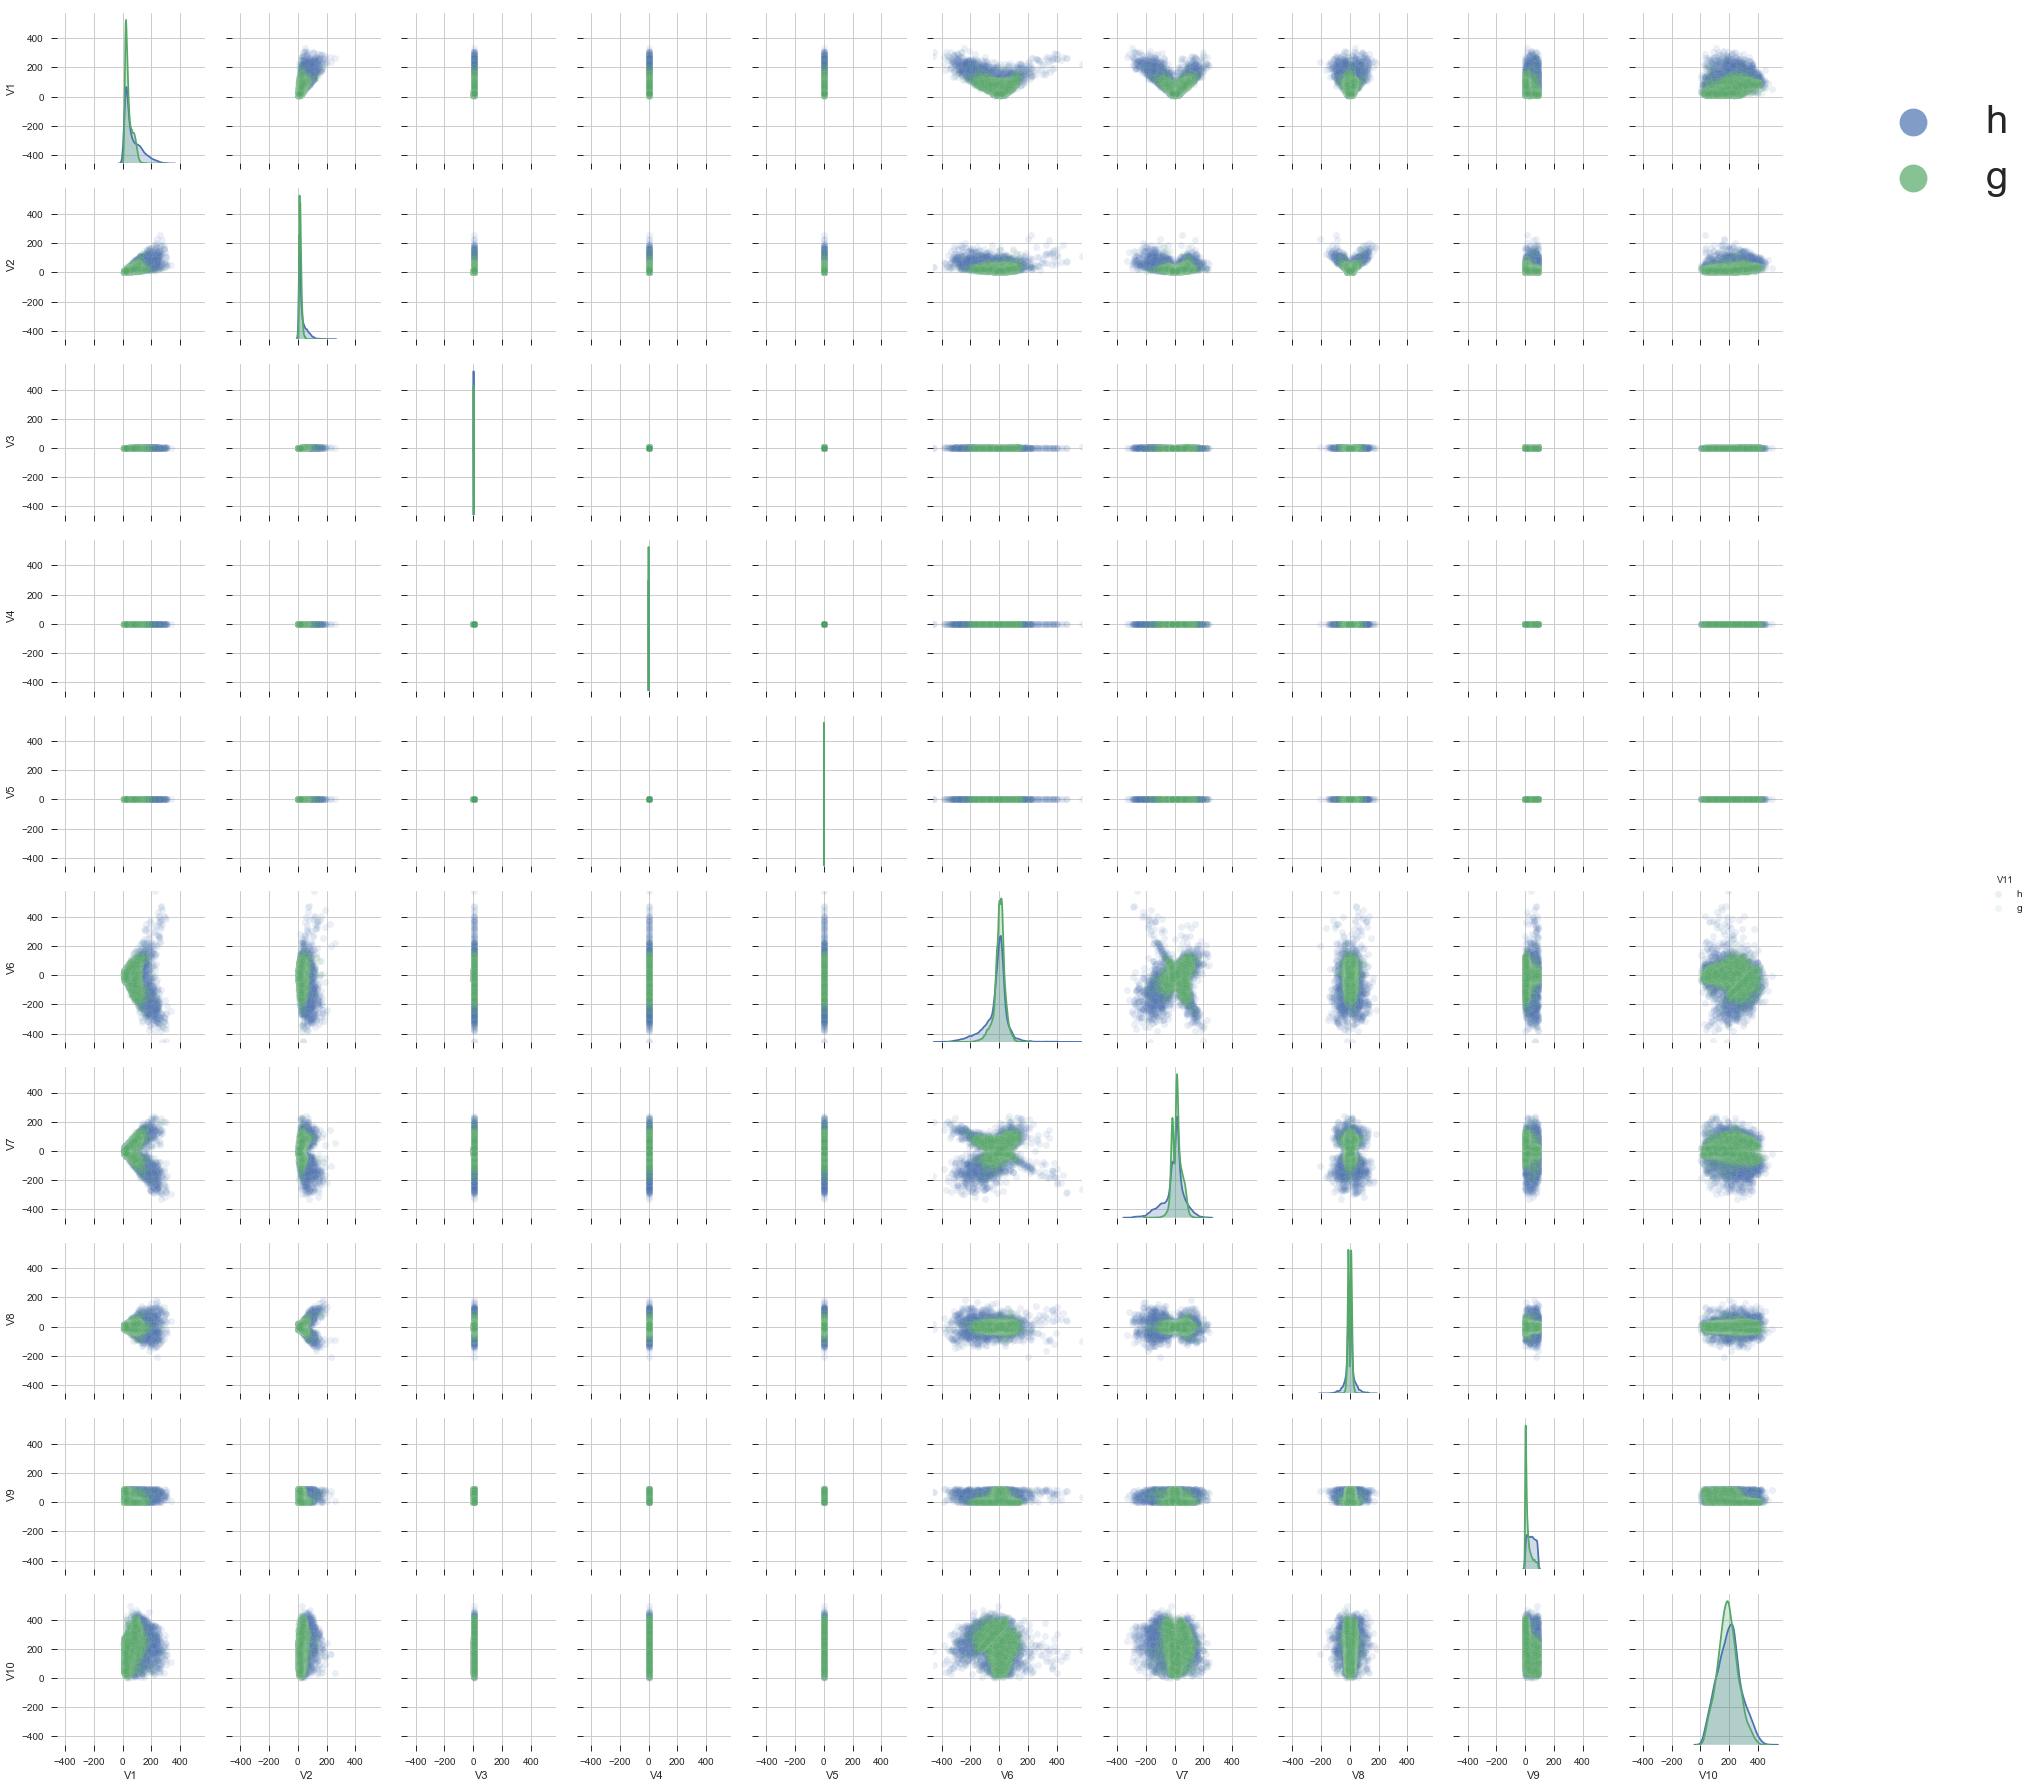

In [13]:
sns.set(style='ticks')
pp = sns.pairplot(df, hue='V11', hue_order=['h', 'g'], plot_kws=dict(alpha=0.1), diag_kind='kde', diag_kws=dict(shade=True))
ax = pp.axes
for i in range(len(df.columns[:-1])):
    for j in range(len(df.columns[:-1])):
        ax[j, i].set_ylim([min_val, max_val])
        ax[j, i].set_xlim([min_val, max_val])
        ax[j, i].xaxis.grid(True)
        ax[j, i].yaxis.grid(True)
        ax[j, i].yaxis.grid(True)
        ax[j, i].set_xticks([-400, -200, 0, 200, 400])
        ax[j, i].set_yticks([-400, -200, 0, 200, 400])
        
leg = plt.legend(markerscale=4, fontsize=40, loc=(1.5, 9))
for lh in leg.legendHandles: 
    lh.set_alpha(0.7)

    
sns.despine(bottom=True, left=True)    
plt.show()